In [7]:
%%capture
!pip install plotly
!pip install nltk
!pip install wordcloud

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
df = pd.read_csv("mentions_predicted_exploded.csv")
len(df)

2752124

In [10]:
df.head(2)

,Unnamed: 0.2,Unnamed: 0.1,index,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,...,replies,likes,mentioned,Runs,model_predictions,mentioned_list,full_name,party,Geschlecht,Gewählt in Vorperiode
0,0,0,0,1,1.435941e+18,CHARLYCAPRI4,1,14.0,NaN,NaN,...,0.0,0.0,['SWagenknecht'],Linke_polis_1,0,swagenknecht,Dr. Sahra Wagenknecht,Die Linke,Frau,ja
1,1,1,1,2,5.286774e+08,jo711,6,308.0,"Ewiger Revolluzer :-) ,\nBiker,Hundeverrückt.N...",jo,...,0.0,0.0,['SWagenknecht'],Linke_polis_1,0,swagenknecht,Dr. Sahra Wagenknecht,Die Linke,Frau,ja


In [43]:
text = []
for index,row in df.iterrows():
    row["text"] = re.sub(r"(?:\@|https?\://)\S+", "", row["text"]).replace('  ','')
    text.append(row["text"])

df["text"] = text
df.head()

,Unnamed: 0.2,Unnamed: 0.1,index,Unnamed: 0,author_id,username,author_followers,author_tweets,author_description,author_location,...,replies,likes,mentioned,Runs,model_predictions,mentioned_list,full_name,party,Geschlecht,Gewählt in Vorperiode
0,0,0,0,1,1.435941e+18,CHARLYCAPRI4,1,14.0,NaN,NaN,...,0.0,0.0,['SWagenknecht'],Linke_polis_1,0,swagenknecht,Dr. Sahra Wagenknecht,Die Linke,Frau,ja
1,1,1,1,2,5.286774e+08,jo711,6,308.0,"Ewiger Revolluzer :-) ,\nBiker,Hundeverrückt.N...",jo,...,0.0,0.0,['SWagenknecht'],Linke_polis_1,0,swagenknecht,Dr. Sahra Wagenknecht,Die Linke,Frau,ja
2,2,2,2,3,7.622651e+08,nimmdenbus,1574,118892.0,Take the bus! Prenez le bus! Mein Herz schlägt...,NaN,...,0.0,0.0,"['MarvinWendland1', 'SWagenknecht', 'BinBerlin...",Linke_polis_1,0,swagenknecht,Dr. Sahra Wagenknecht,Die Linke,Frau,ja
3,3,5,5,6,1.357859e+18,MeisterKlar,0,487.0,Nichts! ich bin einmalig wie jeder andere auch!,NaN,...,0.0,0.0,['SWagenknecht'],Linke_polis_1,0,swagenknecht,Dr. Sahra Wagenknecht,Die Linke,Frau,ja
4,4,6,6,9,7.622651e+08,nimmdenbus,1574,118892.0,Take the bus! Prenez le bus! Mein Herz schlägt...,NaN,...,0.0,1.0,"['SWagenknecht', 'BinBerlinerIn']",Linke_polis_1,0,swagenknecht,Dr. Sahra Wagenknecht,Die Linke,Frau,ja


In [11]:
df.groupby(['party']).size().reset_index(name='counts')

,party,counts
0,AfD,157906
1,Bündnis 90/Die Grünen,705546
2,CDU/CSU,300284
3,Die Linke,140582
4,FDP,429378
5,SPD,1016954
6,fraktionslos,1474


In [52]:
afd = df[df["party"] == " AfD"]
cducsu = df[df["party"] == " CDU/CSU"]
linke = df[df["party"] == " Die Linke"]
fdp = df[df["party"] == " FDP"]
gruene = df[df["party"] == " Bündnis 90/Die Grünen"]
spd = df[df["party"] == " SPD"]

In [45]:
lauterbach = df[df["full_name"] == "Prof. Dr. Karl Lauterbach"]
lauterbach = lauterbach.reset_index()
len(lauterbach)

544631

In [61]:
buschmann = df[df["full_name"] == "Dr. Marco Buschmann"]
buschmann = buschmann.reset_index()
len(buschmann)

141466

In [62]:
dahmen = df[df["full_name"] == "Dr. Janosch Dahmen"]
dahmen = dahmen.reset_index()
len(dahmen)

147665

In [20]:
# group by party and look at sentiment distribution per party

In [18]:
# wordclouds per Party und insgesamt
# Create and generate a word cloud image:

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words("german"))

def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
re.sub(r"(?:\@|https?\://)\S+", "", lauterbach["text"][0]).replace('  ','')

' Sie übernehmen den Telegram Blödsinn 1:1 ?'

In [46]:
lauterbach["text"][0]

' Sie übernehmen den Telegram Blödsinn 1:1 ?'

In [16]:
clean_text(lauterbach["text"][0])

'susan karl lauterbach janoschdahmen goeringeckardt cad heiner garg bundeskanzler swagenknecht anaudretsch ricarda lang kuehnikev larsklingbeil konstantinnotz konstantinkuhle lindner bmwk mikellner übernehmen telegram blödsinn'

In [25]:
def create_wordcloud(input_text, update_stopwords_list, num_words, name):
    # Wordcloud of all texts
    text = " ".join(review for review in input_text.text)
    text = clean_text(text)

    stopwords = set(STOPWORDS)
    stopwords.update(update_stopwords_list)
    # Generate a word cloud image
    mask = np.array(Image.open("twitter_logo.png"))
    wordcloud = WordCloud(stopwords=stopwords,background_color="white",max_words=num_words,mask=mask,contour_color='#1DA1F2',contour_width=3,colormap='viridis').generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Overall Wordcloud where '{name}' is mentioned'")
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f"./plots/wordclouds/{name}_ALL_wordcloud.png")
    
    # Wordcloud of all HOF texts
    input_text_hof = input_text[input_text["model_predictions"] == 1]
    text_hof = " ".join(review for review in input_text_hof.text)
    text_hof = clean_text(text_hof)

    stopwords = set(STOPWORDS)
    stopwords.update(update_stopwords_list)
    # Generate a word cloud image
    mask = np.array(Image.open("twitter_logo.png"))
    wordcloud = WordCloud(stopwords=stopwords,background_color="white",max_words=num_words,mask=mask,contour_color='#1DA1F2',contour_width=3,colormap='viridis').generate(text_hof)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"'HOF'-Wordcloud where '{name}' is mentioned'")
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f"./plots/wordclouds/{name}_HOF_wordcloud.png")
    
        
    # Wordcloud of all NOT texts
    input_text_not = input_text[input_text["model_predictions"] == 0]
    text_not = " ".join(review for review in input_text_not.text)
    text_not = clean_text(text_not)

    stopwords = set(STOPWORDS)
    stopwords.update(update_stopwords_list)
    # Generate a word cloud image
    mask = np.array(Image.open("twitter_logo.png"))
    wordcloud = WordCloud(stopwords=stopwords,background_color="white",max_words=num_words,mask=mask,contour_color='#1DA1F2',contour_width=3,colormap='viridis').generate(text_not)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"'NOT'-Wordcloud where '{name}' is mentioned'")
    plt.axis("off")
    plt.show()
    wordcloud.to_file(f"./plots/wordclouds/{name}_NOT_wordcloud.png")

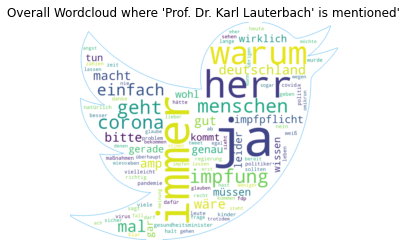

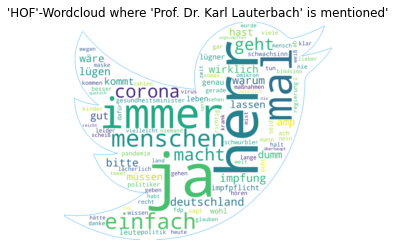

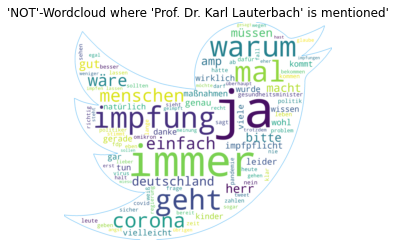

In [65]:
create_wordcloud(lauterbach, ["karl", "lauterbach", "https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "Prof. Dr. Karl Lauterbach")

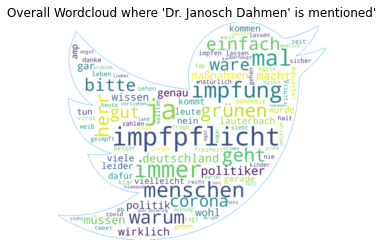

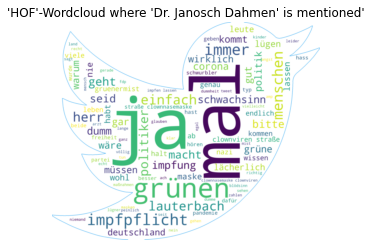

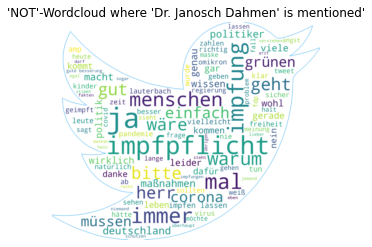

In [64]:
create_wordcloud(dahmen, ["janosch", "dahmen", "https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "Dr. Janosch Dahmen")

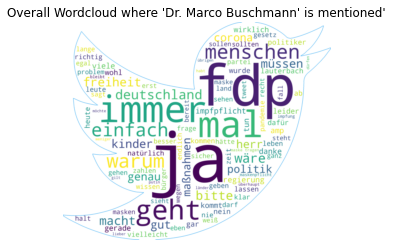

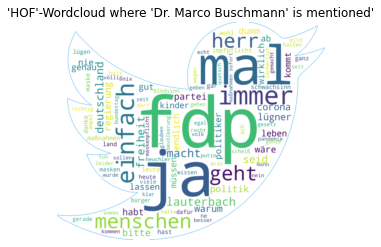

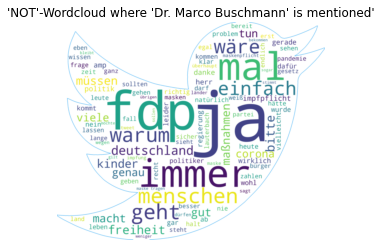

In [63]:
create_wordcloud(buschmann, ["marco", "buschmann", "https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "Dr. Marco Buschmann")

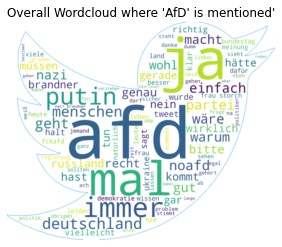

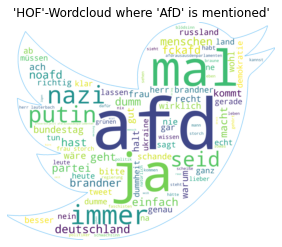

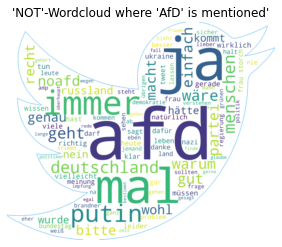

In [48]:
create_wordcloud(afd, ["https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "AfD")

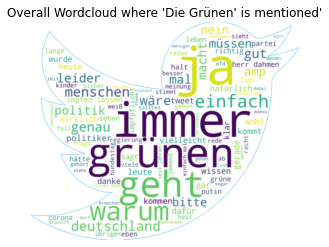

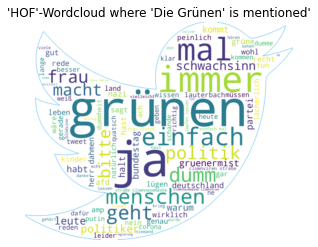

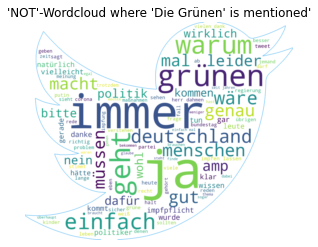

In [49]:
create_wordcloud(gruene, ["https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "Die Grünen")

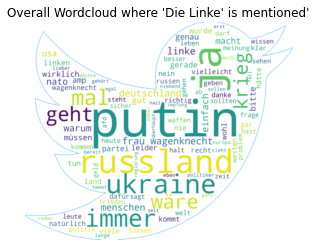

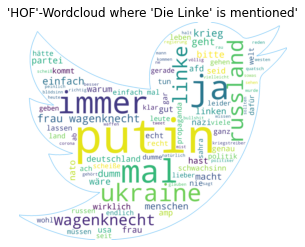

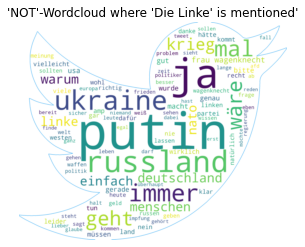

In [55]:
create_wordcloud(linke, ["https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "Die Linke")

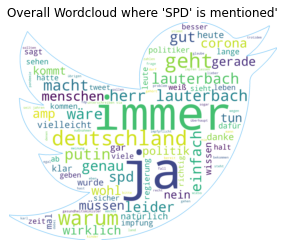

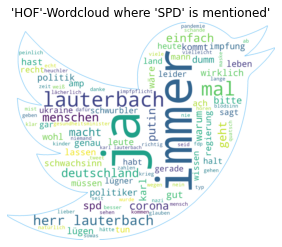

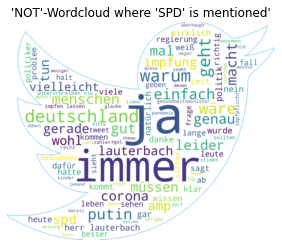

In [56]:
create_wordcloud(spd, ["https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "SPD")

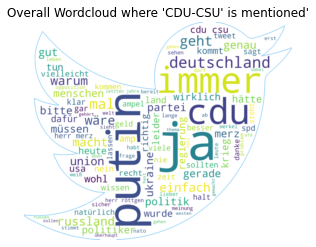

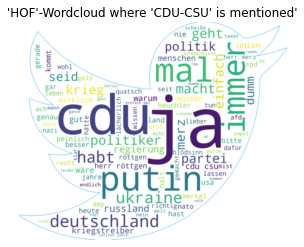

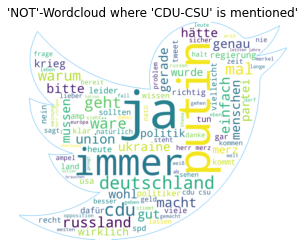

In [59]:
create_wordcloud(cducsu, ["https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "CDU-CSU")

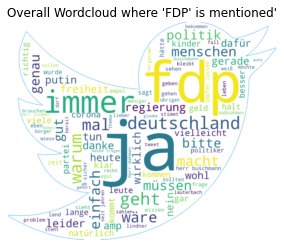

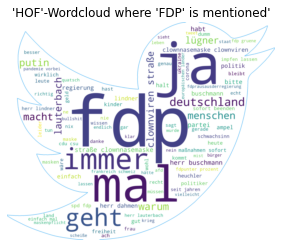

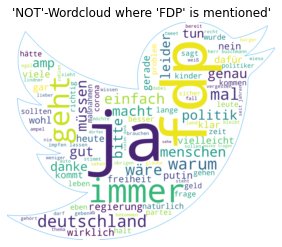

In [58]:
create_wordcloud(fdp, ["https", "bmg", "mehr", "bund", "co", "sagen", "schon", "eigentlich", "gibt", "wer"], 100, "FDP")